In [69]:
import seaborn as sns
import pandas as pd
import dataframe_image
import datetime
import matplotlib.pyplot as plt
from datetime import timedelta

In [59]:
def openFile(path):
    data = pd.read_csv(path)
    return data

In [60]:
def cleanUp (data, process, completedKeyword, dropColumns=['Resource', 'Loaded','LastUpdated', 'Exception', 'Deferred','Completed','KeyValue','Priority','Attempt','Locked','ExceptionReason','isLocked']):
    data['isLocked'] = data['Locked'].apply(lambda x: 1 if pd.notnull(x) else 0)
    data['Status'] = data['Status'].apply(lambda x: x if pd.notnull(x) else "Pending")
    data = data.apply(lambda row: setStatus(row, completedKeyword), axis=1)
    data = data.drop(columns=dropColumns)
    data["Process"] = process
    return data

In [61]:
def toString(data):
    print("Complete: " + getStatusCount(data,"Complete"))
    print("Business Exception: " + getStatusCount(data,"Business Exception"))
    print("Locked: " + getStatusCount(data,"Locked"))
    print("Pending " + getStatusCount(data,"Pending"))
    print("Exception " + getStatusCount(data,"Exception"))

In [62]:
def setStatus(row, completedKeyword):
    if pd.notnull(row["Tags"]) and "Business Exception" in row["Tags"]:
        row["Status"] = "Business Exception"
    elif row["isLocked"] == 1:
        row["Status"] = "Locked"
    elif row["Status"] == completedKeyword:
        row["Status"] = "Complete"
    elif row["Status"] == "Pending":
        pass
    else:
        row["Status"] = "Exception"
    return row

In [63]:
def getStatusCount(data,status):
    count, _ = data[data["Status"] == status].shape
    return str(count)

In [64]:
def getWorktimeDF(row):
    minutes = int(row["Worktime"]/60)
    seconds = (row["Worktime"]%60)
    timespan = timedelta(minutes=minutes,seconds=seconds)
    row["Worktime"] = timespan
    return row

In [65]:
def getWorktime(value):
    minutes = int(value/60)
    seconds = (value%60)
    timespan = timedelta(minutes=minutes,seconds=seconds)
    return timespan

In [66]:
def averageWorktime(data,status=None):
    if status is None:
        return round(data["Worktime"].mean())
    else:
        return round(data[data["Status"] == status]["Worktime"].mean())

In [67]:
directory = "resources/reports/08-26/"
filename = "icd.csv"
path = directory + filename
data = openFile(path)
cleandf = cleanUp(data,"ICD","Complete")
cleandf

,Id,Status,Tags,Worktime,Process
0,d85107f7-1863-4498-adf6-ed899104fcf7,Locked,Conventional,0,ICD
1,de1f84fb-3f83-4be2-8e57-262485faeaa2,Complete,Redisclosure: 0,632,ICD
2,2795cd33-e771-420d-bcce-4c8f33feeaab,Locked,NaN,0,ICD
3,b0e8d75f-786c-4c9a-87c1-438783443aa1,Complete,Conventional;Redisclosure: 1;Run UCD,718,ICD
4,ec2fe0f5-b498-4396-a724-aeb70611551a,Locked,Conventional,0,ICD
...,...,...,...,...,...
3792,9c1a0a83-dac5-4758-b1be-406aaea2a3f2,Exception,Exception: Failed to perform step 2 in Navigat...,655,ICD
3793,55d5fe8e-ba91-48e5-9c29-39d306988904,Complete,Conventional;Redisclosure: 1;Run UCD,350,ICD
3794,540af3ab-cbbf-41ab-94ec-54b0364c855b,Complete,Conventional;Redisclosure: 1;Run UCD,312,ICD
3795,4e31cf88-16a8-40fe-a86c-4050b939a7ef,Complete,Redisclosure: 1,201,ICD


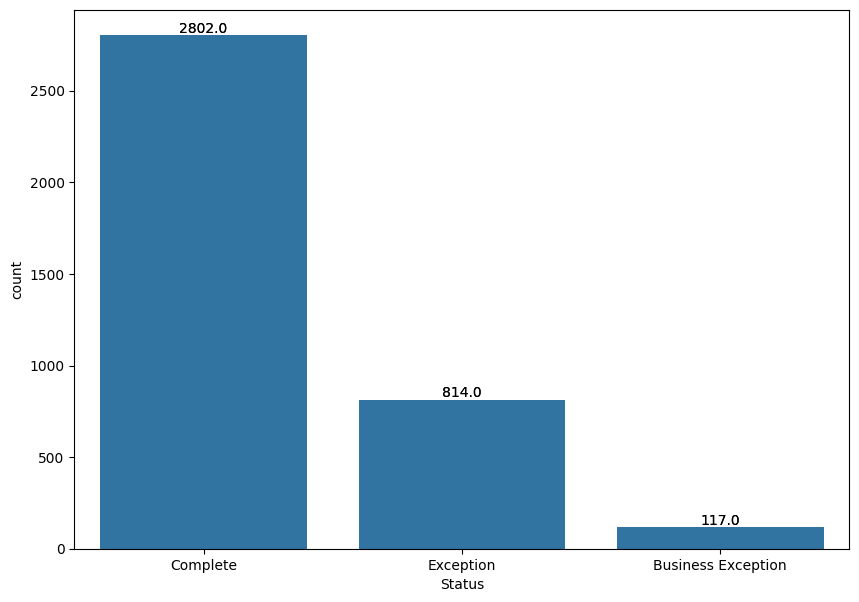

<Figure size 640x480 with 0 Axes>

In [111]:
df = cleandf[~((cleandf["Status"] == "Locked") | (cleandf["Status"] == "Pending"))]
plt.figure(figsize = (10,7))
sns.countplot(data = df, x = 'Status',hue="Status",legend=False,palette="Set2")
ax = sns.countplot(x='Status', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(height,
                (p.get_x() + p.get_width() / 2., height),
                ha = 'center', va = 'center',
                xytext = (0, 5),  # 9 points vertical offset
                textcoords = 'offset points')
plt.show()
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)